# XGBoost Algoritması Regresyon Modeli Kuralım.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
# Veri setini oluşturalım.
np.random.seed(42)
n_samples = 1000

categories = np.random.choice(['Elektronik', 'Giyim', 'Ev & Yaşam', 'Spor'], n_samples)
prices = np.random.randint(50, 500, n_samples)
discounts = np.random.uniform(0.05, 0.3, n_samples)
sales = prices * (1 - discounts)

data = pd.DataFrame({
    'Category': categories,
    'Price': prices,
    'Discount': discounts,
    'Sales': sales
})
data.head()

,Category,Price,Discount,Sales
0,Ev & Yaşam,496,0.166828,413.253465
1,Spor,194,0.124251,169.895360
2,Elektronik,250,0.263205,184.198636
3,Ev & Yaşam,466,0.228888,359.338039
4,Ev & Yaşam,261,0.197277,209.510668


# Veri Analizi

In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,1000.0,273.347000,131.110612,50.000000,160.000000,276.500000,382.250000,499.000000
Discount,1000.0,0.174477,0.071844,0.050083,0.109569,0.176927,0.236846,0.299084
Sales,1000.0,225.411298,110.052578,36.319001,130.691994,227.255605,313.330587,458.427112


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  1000 non-null   object 
 1   Price     1000 non-null   int32  
 2   Discount  1000 non-null   float64
 3   Sales     1000 non-null   float64
dtypes: float64(2), int32(1), object(1)
memory usage: 27.5+ KB


In [5]:
data.corr()

,Price,Discount,Sales
Price,1.000000,0.025809,0.979836
Discount,0.025809,1.000000,-0.154977
Sales,0.979836,-0.154977,1.000000


In [6]:
data.var(numeric_only=True)

Price       17189.992584
Discount        0.005162
Sales       12111.569837
dtype: float64

In [7]:
data.isnull().any().sum()

0

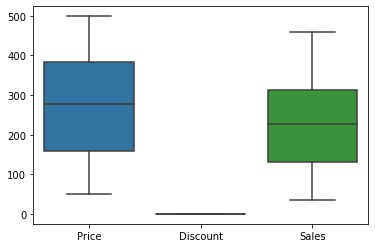

In [8]:
sns.boxplot(data=data);

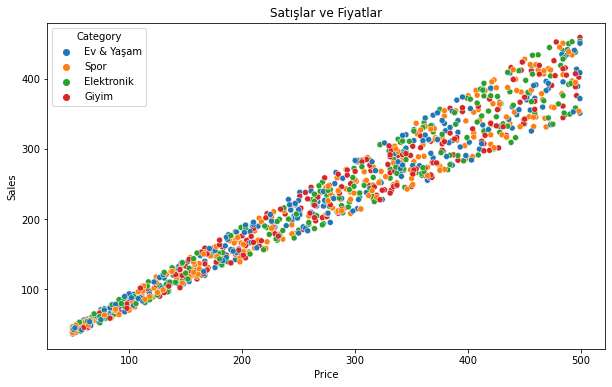

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Price', y='Sales', hue='Category')
plt.title('Satışlar ve Fiyatlar')
plt.show()

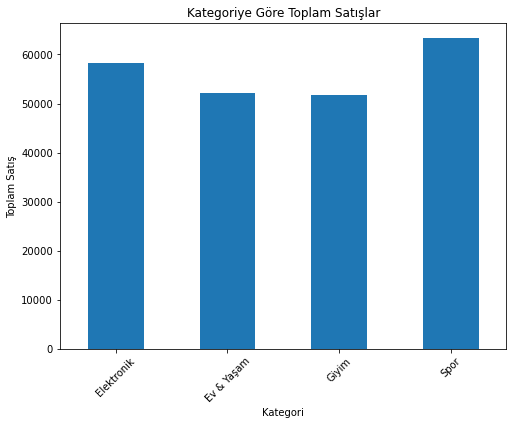

In [10]:
category_sales = data.groupby('Category')['Sales'].sum()

plt.figure(figsize=(8, 6))
category_sales.plot(kind='bar')
plt.title('Kategoriye Göre Toplam Satışlar')
plt.xlabel('Kategori')
plt.ylabel('Toplam Satış')
plt.xticks(rotation=45)
plt.show()

# Veri Ön İşleme

In [11]:
data.head(1)

,Category,Price,Discount,Sales
0,Ev & Yaşam,496,0.166828,413.253465


In [12]:
# Kategori değişkenini sayısal değişkene çevirelim.
data['Category'] = data['Category'].map({
    'Elektronik':0,
    'Ev & Yaşam':1, 
    'Giyim': 2,
    'Spor': 3
})

In [13]:
# Değişkenleri Standartlaştıralım.
lbe = StandardScaler()

data['Category'] = lbe.fit_transform(data['Category'].values.reshape(-1, 1))
data['Price'] = lbe.fit_transform(data['Price'].values.reshape(-1, 1))
data['Discount'] = lbe.fit_transform(data['Discount'].values.reshape(-1, 1))

In [14]:
data.head(1)

,Category,Price,Discount,Sales
0,-0.462176,1.699057,-0.106529,413.253465


# Model 

In [15]:
# Bağımlı ve bağımsız değişkenleri oluşturalım.
X = data.drop('Sales', axis=1)
y = data['Sales']

In [16]:
# Eğitim ve test setlerini ayıralım.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Modeli oluşturalım ve eğitelim.
model = XGBRegressor().fit(X_train, y_train)

In [18]:
# Tahmin işlemi yapalım.
predict = model.predict(X_test)

In [19]:
# Modeli Değerlendirelim.
r2 = r2_score(y_test, predict)
mse = mean_squared_error(y_test, predict)
rmse = np.sqrt(mse)

print('R^2: ', r2)
print('MSE: ', mse)
print('RMSE: ', rmse)

R^2:  0.9986283536356866
MSE:  15.807002132880791
RMSE:  3.9758020741582185


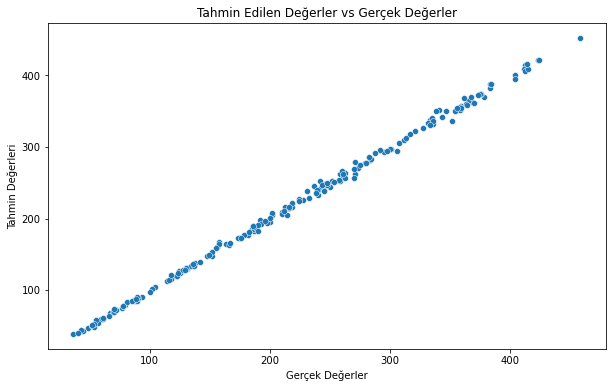

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=predict)
plt.title('Tahmin Edilen Değerler vs Gerçek Değerler')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Değerleri')
plt.show()

# Model Tuning

In [21]:
model.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [22]:
params = {
    'learning_rate': [None, 0.1, 0.01, 0.001],
    'max_depth': [None, 3, 5, 7],
    'n_estimators': [100, 200, 300, 500, 1000]
}

grid = GridSearchCV(estimator=XGBRegressor(), param_grid=params, cv=5)
grid.fit(X_train, y_train)

best_params = grid.best_params_
best_score = grid.best_score_

print('Best Parameters: ', best_params)
print('Best Score: ', best_score)

Best Parameters:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 1000}
Best Score:  0.999319166102002


### Model tuning kısmında bulduğumuz hiperparametreleri kullanarak modelimizi tekrar oluşturalım.

In [24]:
model = XGBRegressor(**best_params).fit(X_train, y_train)
predict = model.predict(X_test)

r2 = r2_score(y_test, predict)
mse = mean_squared_error(y_test, predict)
rmse = np.sqrt(mse)

print('R^2: ', r2)
print('MSE: ', mse)
print('RMSE: ', rmse)

R^2:  0.9995020945502603
MSE:  5.73791664584648
RMSE:  2.395394883071783


In [26]:
result = pd.DataFrame({
    'Gerçek Değerler': y_test,
    'Tahmini Değerler': predict
})
result.head()

,Gerçek Değerler,Tahmini Değerler
521,60.375764,60.913799
737,191.681690,194.178741
740,87.851545,84.157127
660,412.462673,417.015594
411,242.054898,241.632736
